#### Importing  necessary libraries

In [1]:
import pandas as pd
import os

#### Merge data from each month into one CSV

In [2]:

files=[ file for file in os.listdir("/Users/adithkumarsinghh/Sales_Data")]

all_month_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("/Users/adithkumarsinghh/Sales_Data/"+file)
    all_month_data=pd.concat([all_month_data,df])

all_month_data.head()

all_month_data.to_csv("allmonthsdata.csv",index=False)
    
    

### Read in the Updated data 


In [3]:
alldata=pd.read_csv("/Users/adithkumarsinghh/allmonthsdata.csv")
alldata.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


#### Cleaning  up the data!

In [4]:
#Get rid of text in order date column
alldata= alldata[alldata['Order Date'].str[0:2] != 'Or' ]

In [5]:
# Finding  NAN
nan_data=alldata[alldata.isna()]
nan_data.head()
alldata=alldata.dropna(how='all')

In [6]:
alldata['Quantity Ordered']=pd.to_numeric(alldata['Quantity Ordered'])
alldata['Price Each']=pd.to_numeric(alldata['Price Each'])
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Augment Data with Additional Colums


In [7]:
alldata['month']= alldata['Order Date'].str[0:2]
alldata['month']=alldata['month'].astype('int32')
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


#### ADD SALES CLOUMN

In [8]:
alldata['Sales']=alldata['Quantity Ordered']* alldata['Price Each']

####  Add  a City Columm


In [9]:
def get_city(x):
    return x.split(",")[1]

def get_state(x):
    return x.split(",")[2].split(" ")[1]

alldata['city']=alldata['Purchase Address'].apply(lambda x:f"{get_city(x)} ({(get_state(x))})")
alldata.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta (GA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
result=alldata.groupby('month').sum()
result

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


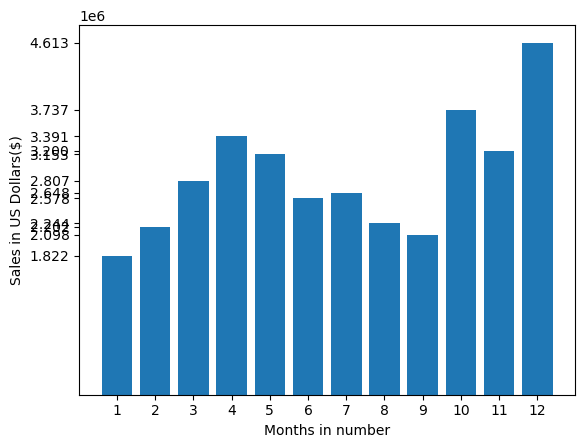

In [12]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xlabel('Months in number')
plt.ylabel('Sales in US Dollars($)')
plt.xticks(months)
plt.yticks(result['Sales'])
plt.show()


#### Question 2: What city sold the most product?

In [13]:
result=alldata.groupby('city').sum()

,Quantity Ordered,Price Each,month,Sales
city,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


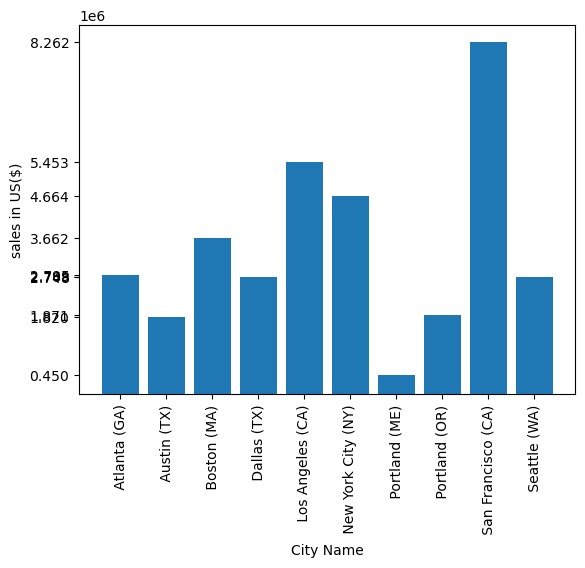

In [14]:
import matplotlib.pyplot as plt

cities=[city for city, df in alldata.groupby('city')]

plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical')
plt.yticks(result['Sales'])
plt.xlabel("City Name")
plt.ylabel("sales in US($)")
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [26]:
alldata['Order Date'] =pd.to_datetime(alldata['Order Date'])

alldata['Hour']=alldata['Order Date'].dt.hour
alldata['Minute']=alldata['Order Date'].dt.minute
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [27]:
result=alldata.groupby("Hour").count()


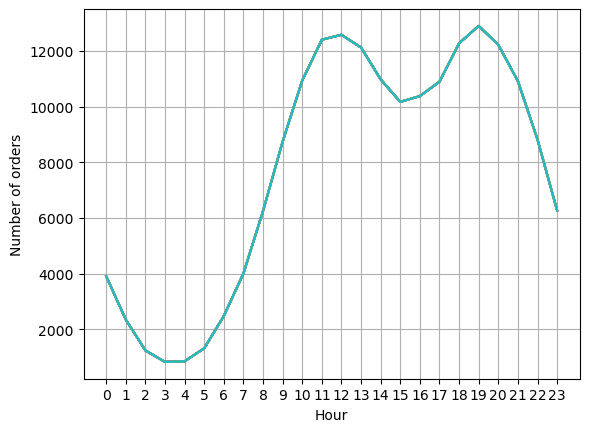

In [28]:
result=alldata.groupby("Hour").count()

hour=[hour for hour, df in alldata.groupby("Hour")]

plt.plot(hour,result)
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [18]:
df=alldata[alldata["Order ID"].duplicated(keep=False)]

df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()

/var/folders/js/_9w4lq_n0_nbm4n975d4d_9c0000gn/T/ipykernel_1662/311913818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [19]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
for rows,values in count.most_common(10):
    print(rows,values)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: what product sold the most and why do you think it sold the most ?

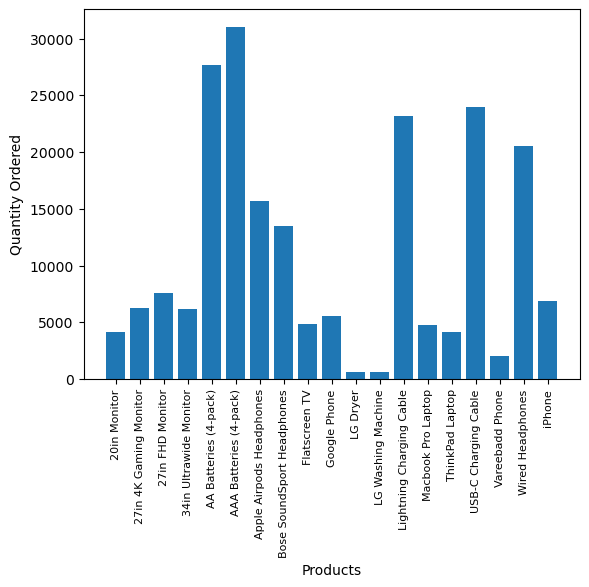

In [21]:
product_data=alldata.groupby('Product')

product=[product for product,df in product_data]
quantity_ordered=product_data.sum()['Quantity Ordered']

plt.bar(product,quantity_ordered)
plt.xticks(product,rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

/var/folders/js/_9w4lq_n0_nbm4n975d4d_9c0000gn/T/ipykernel_1662/4051554909.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)
/var/folders/js/_9w4lq_n0_nbm4n975d4d_9c0000gn/T/ipykernel_1662/4051554909.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


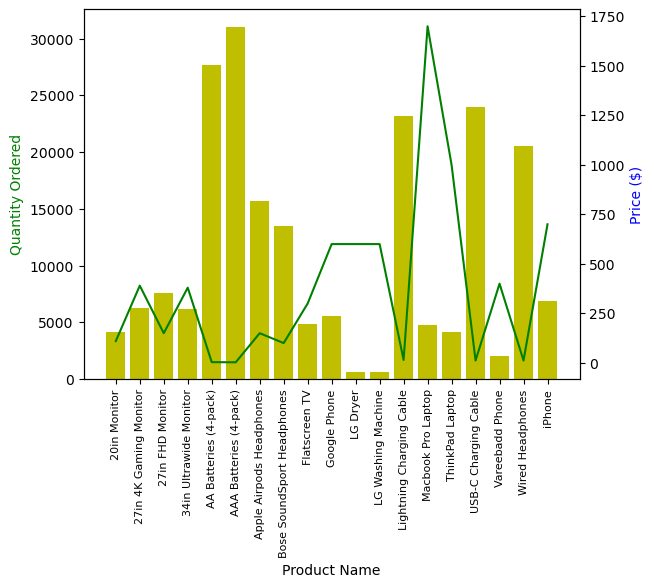

In [23]:
prices = alldata.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='y')
ax2.plot(product, prices, color='g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

fig.show()